In [9]:
import numpy as np
import cv2
from util_func import *
import matplotlib.pyplot as plt

In [10]:
# Load the input image
image = cv2.imread('images/boat.jpg', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu thresholding to segment the image
_, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected regions
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding boxes

# Display the result
cv2.imshow('Segmented Image with Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Load the input image
image = cv2.imread('images/leaf.jfif', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the leaf from the background
_, thresholded_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# Create a GUI window and trackbar
cv2.namedWindow('Morphological Transformations')

def apply_morphology(size):
    # Create a structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    
    # Apply morphological transformation
    eroded = cv2.erode(thresholded_image, kernel, iterations=1)
    dilated = cv2.dilate(thresholded_image, kernel, iterations=1)
    opened = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)
    
    # Stack the resulting images horizontally for display
    stacked_images = np.hstack((eroded, dilated, opened, closed))
    
    # Display the resulting images
    cv2.imshow('Morphological Transformations', stacked_images)

# Create a trackbar to control the size of the structuring element
cv2.createTrackbar('Size', 'Morphological Transformations', 1, 30, apply_morphology)

# Initialize the GUI with the initial state
apply_morphology(1)

# Keep the GUI window open until a key is pressed
cv2.waitKey(0)
cv2.destroyAllWindows()

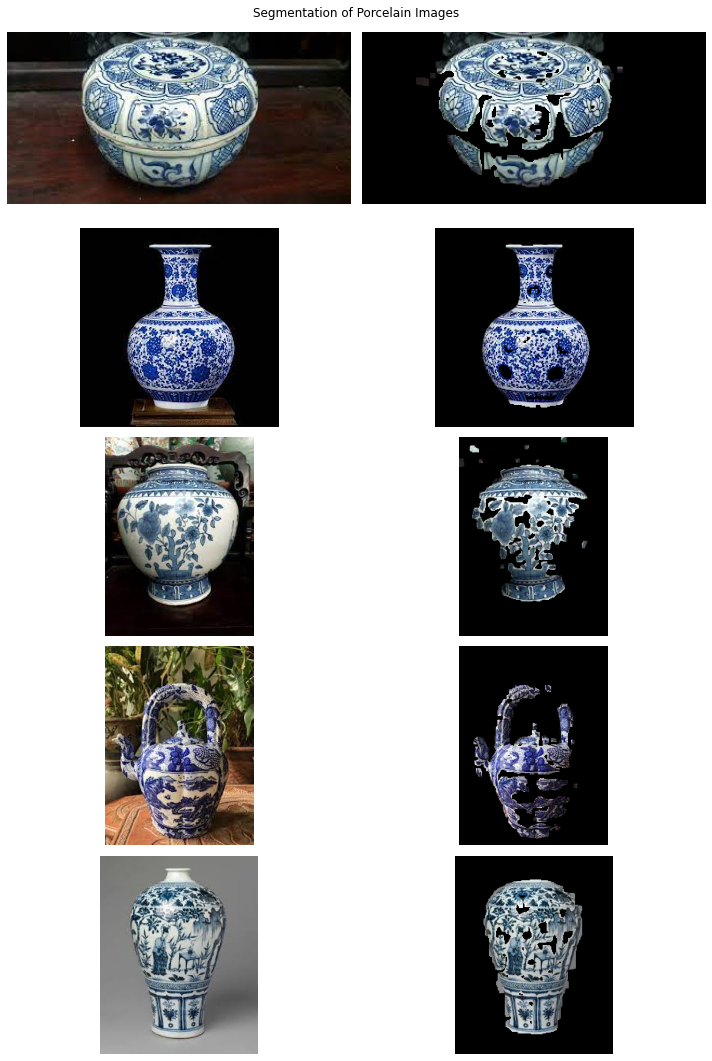

In [12]:
def perform_porcelain_segmentation(image, lower_color_bound, upper_color_bound, apply_smoothing=True):
    original_image = image.copy()
    if apply_smoothing:
        image = cv2.GaussianBlur(image, (5, 5), 0)
        
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_image, lower_color_bound, upper_color_bound)
    
    # Apply morphological operations for refining segmentation
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    
    segmented_result = cv2.bitwise_and(original_image, original_image, mask=mask)
    return segmented_result

blue_color_lower_bound = (70, 5, 20)
blue_color_upper_bound = (180, 210, 255)

porcelain_images = []
for i in range(1, 6):
    img = cv2.imread(cv2.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    porcelain_images.append(img)

segmented_porcelain_images = [perform_porcelain_segmentation(img, blue_color_lower_bound, blue_color_upper_bound) for img in porcelain_images]

fig, ax = plt.subplots(5, 2, figsize=(10, 15))

for i in range(5):
    ax[i][0].imshow(porcelain_images[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(segmented_porcelain_images[i])
    ax[i][1].axis("off")
    
plt.suptitle("Segmentation of Porcelain Images")
plt.tight_layout()
plt.show()